# Circuito RLC

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from scipy.fft import fft, fftfreq

In [2]:
sns.set_theme()

## Análise de curva

In [6]:
ch1, ch2 = np.loadtxt('data_ch1.txt').transpose(), np.loadtxt('data_ch2.txt').transpose()

In [7]:
w0 = 920 * 2 * np.pi

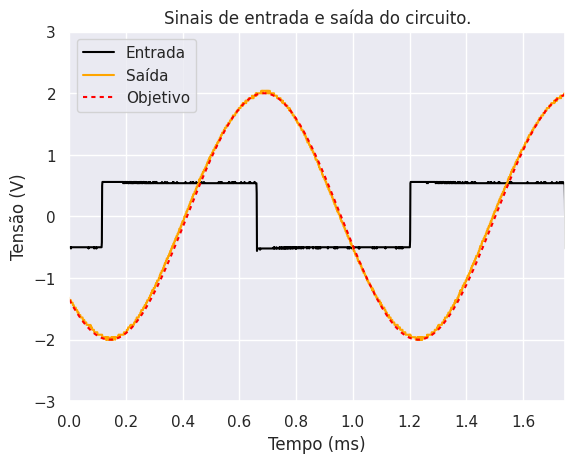

In [8]:
plt.title('Sinais de entrada e saída do circuito.')

sns.lineplot(x=ch1[0] * 1000 + 1.2, y=ch1[1], label='Entrada', color='black')
sns.lineplot(x=ch2[0] * 1000 + 1.2, y=ch2[1], label='Saída', color='orange')

x = np.linspace(0, 1.8E-3, 1000)
sns.lineplot(x=x * 1000, y=2 * np.sin(w0 * x - 2.4), color='red', dashes=(2,2), label='Objetivo')

plt.xlim(0*1000, ch2[0][-1]*1000 + 1.2)
plt.ylim(-3, 3)
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensão (V)')

plt.savefig('plots/waves.png', dpi=300, facecolor='white', bbox_inches='tight')
plt.show()

In [63]:
v0 = (np.max(ch1[1]) - np.min(ch1[1])) / 2
v0

0.5700000000000001

## Expansão de Fourier

In [101]:
def current(w, V0, R, L, C): return V0 / np.sqrt( R**2 + ( w * L - 1 / (w * C) )**2 )

In [102]:
N = 1000

w = 920

dt = 1 / (N * w)

In [103]:
time = np.linspace(0, 1 / w, N)

In [104]:
signal = np.zeros(N) - 1 * v0
signal[N//2:-1] += 2 * v0

In [105]:
yf = fft(signal)
xf = fftfreq(N, d=dt)

In [106]:
n_signal = np.zeros(N)

for i in range(100):
  n_signal -= (2/N) * np.abs(yf[i]) * np.sin(2 * np.pi * xf[i] * time)

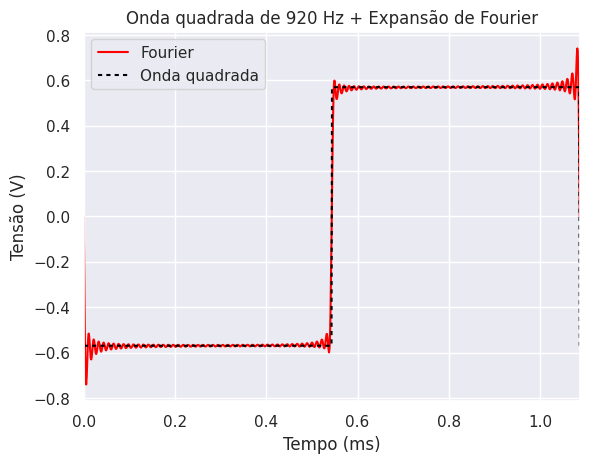

In [107]:
plt.title('Onda quadrada de 920 Hz + Expansão de Fourier')
sns.lineplot(x=time * 1000, y=n_signal, color='red', label='Fourier')
sns.lineplot(x=time * 1000, y=signal, color='black', dashes=(2,2), label='Onda quadrada')
plt.xlabel('Tempo (ms)')
plt.ylabel('Tensão (V)')
plt.xlim(0, 1000 / w)
plt.show()

In [117]:
R, L, C = 1000, 27E-3, 1E-6

In [118]:
signal_current = np.zeros(N)

for i in range(1, 100):
  signal_current += current( xf[i], (2/N) * np.abs(yf[i]), R, L, C )

<Axes: >

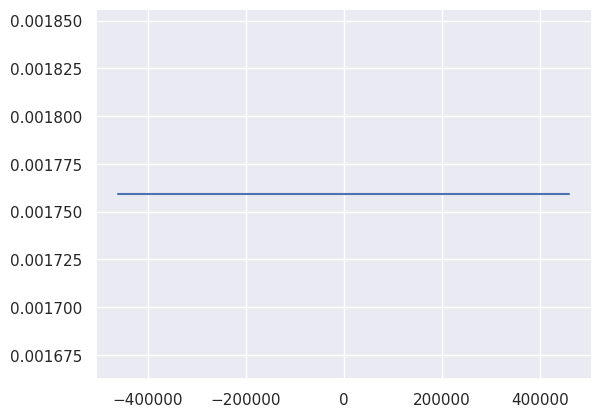

In [119]:
sns.lineplot(x=xf, y=signal_current)

In [80]:
signal_current

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, na